## Police Killings

The Guardian launched “The Counted,” an impressive interactive database of Americans killed by police since the start of the year. It started in 2015, but you can check the recent stats for 2016. We will explore the data by race, income and state.

### Assignment

- Import the data and examine the head and columns
- Get the total counts for each racial grouping
- Find the relative % for each racial grouping
- How do the killings compare with the overall US breakdown of population by race?

In [8]:
import pandas as pd
killings = pd.read_csv('police_killings.csv', encoding="ISO-8859-1")
killings.head()



,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [7]:
killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [10]:
total_race = killings['raceethnicity'].value_counts()
print(total_race)

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


In [12]:
total_race*100/ sum(total_race)

White                     50.535332
Black                     28.907923
Hispanic/Latino           14.346895
Unknown                    3.211991
Asian/Pacific Islander     2.141328
Native American            0.856531
Name: raceethnicity, dtype: float64

In [ ]:
#The percentage by race seem to similar to the Total US population demographic breakdown.


### Assignment

- Graph the killings by race using a bar chart. Make sure to label the graph and axes
- Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
- Calculate the median "p_income"

([<matplotlib.axis.XTick at 0x10e985e48>,
 <a list of 6 Text xticklabel objects>)

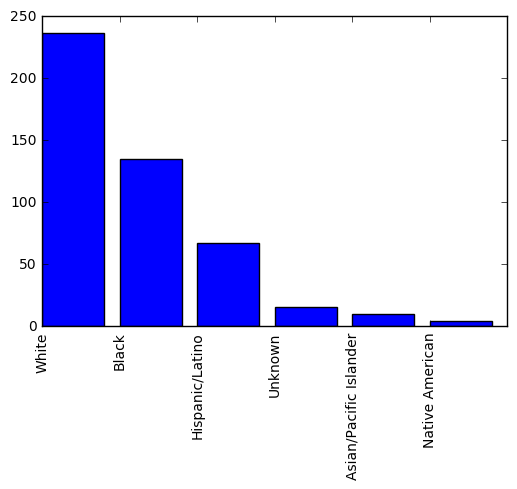

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), total_race)
plt.xticks(range(6), total_race.index, rotation='vertical')



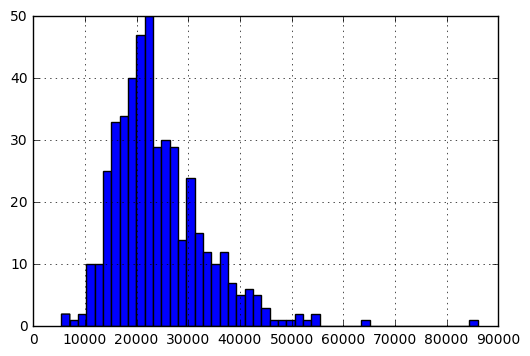

In [22]:
killings['p_income'][killings['p_income'] != '-'].astype(int).hist(bins=50)

In [23]:
killings['p_income'][killings['p_income'] != '-'].astype(int).median()

22348.0

### Assignment

- Find the total killings per each state
- Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic" 
- Convert the values in those columns to float types
- Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
    
    lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
    
    highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [24]:
killings['state'].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
LA    11
IL    11
WA    11
NJ    11
NC    10
MO    10
MD    10
OH    10
VA     9
SC     9
MI     9
IN     8
AL     8
OR     8
PA     7
KY     7
KS     6
TN     6
NE     6
MN     6
MS     6
WI     5
UT     5
MA     5
NM     5
ID     4
AR     4
HI     4
NV     3
WV     2
DE     2
MT     2
AK     2
IA     2
WY     1
DC     1
NH     1
ME     1
CT     1
Name: state, dtype: int64

In [36]:
kill= killings[(killings['share_white'] != '-')&(killings['share_black'] != '-')&(killings['share_hispanic'] != '-')]
share = ['share_white', 'share_black', 'share_hispanic']
kill[share]=kill[share].astype(float)
kill.head()

/Users/HomeFolder/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [38]:
col= ['pop', 'county_income','share_white', 'share_black','share_hispanic']
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

low = kill[kill['state'].isin(lowest_states)]
low[col].mean()



pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [39]:
high = kill[kill['state'].isin(highest_states)]
high[col].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64